# 1. Strategy 패턴

* Strategy 패턴은 Behavioral Design Pattern
* Policy Pattern
* 알고리즘이 서로 다르고, 실행시점에 하나를 선택하여 실행하는 경우
    * 라면의 조리가 서로 다른 경우
    * 영화를 보는 경우, 누구는 초대권, 누구는 멤버쉽 할인 등 서로 다른 경우
* 대표적인 사례로는 정렬.
    * Collections.sort() 함수에서 Comparator 인터페이스를 이용하는 경우, 서로 다른 정렬 알고리즘을 구현하고, 실행 시점에 결정함.


* 디자인패턴 요소

요소 | 설명
---|---
name | Strategy
problem | 알고리즘 서로 다른 버전이 존재해서, if문으로 처리해야 하거나 중복이 발생 
solution | 중복을 공통화, 실행시점에 맞는 알고리즘을 호출
consequence | OCP

In [ ]:
* 프로그래밍 예제
    * 'Duck' (HFDP Ch1)
    * 'Sort'
    * exercise (by Sat to git: 50% for 1 day late deadline) 
        * case extension - 거북이를 무게에 따라 정렬
        * new case - 

## 2. 문제

* 경우에 따라 서로 다른 여러 알고리즘이 존재
* 알고리즘이 실행시점에 결정이 되고
* 조건문을 사용해서 서로 다른 알고리즘을 결정


## 3. 설계

클래스 | 설명
-----|-----
Context | 적용할 Strategy를 결정. 속성으로 사용할 Strategy를 가진다.
Strategy | 런타임에 사용하는 Strategy로서 구현은 하위 Strategy1에 위임한다.
Strategy1 | 실행시점에 적용하는 Strategy를 가진다.

In [1]:
import iplantuml

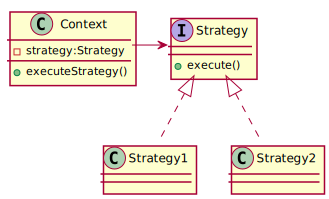

In [3]:
%%plantuml

@startuml
class Context {
    -strategy:Strategy
    +executeStrategy()
}
interface Strategy {
    +execute()
}
Context -right-> Strategy
Strategy <|.. Strategy1
Strategy <|.. Strategy2
@enduml

## 4. 사례

사례 | 설명
------|------
사례 1 | Duck fly()
사례 2 | 정렬 - compareTo(), Interface Comparator를 구현하는 경우

### S.4.1

* Duck의 Flyable, Quackable을 실행시점에 결정

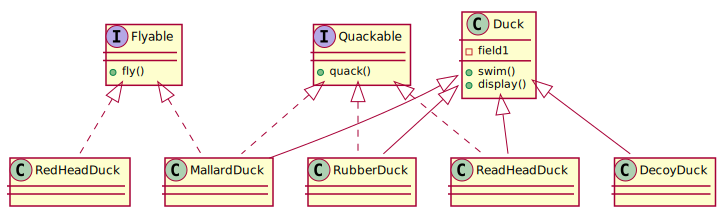

In [2]:
%%plantuml

@startuml

Duck <|-- MallardDuck
Duck <|-- ReadHeadDuck
Duck <|-- RubberDuck
Duck <|-- DecoyDuck

Flyable <|.. MallardDuck
Flyable <|.. RedHeadDuck

Quackable <|.. MallardDuck
Quackable <|.. ReadHeadDuck
Quackable <|.. RubberDuck

class Duck {
  -field1
  +swim()
  +display()
}

Interface Flyable {
    +fly()
}

Interface Quackable {
    +quack()
}

@enduml

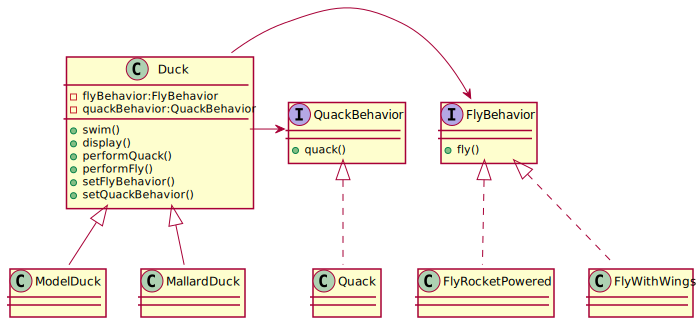

In [18]:
%%plantuml
@startuml
Duck <|-- MallardDuck
Duck <|-- ModelDuck
FlyBehavior <|.. FlyWithWings
FlyBehavior <|.. FlyRocketPowered
QuackBehavior <|.. Quack
Duck -> FlyBehavior
Duck -> QuackBehavior
class Duck {
    -flyBehavior:FlyBehavior
    -quackBehavior:QuackBehavior
    +swim()
    +display()
    +performQuack()
    +performFly()
    +setFlyBehavior()
    +setQuackBehavior()
}
Interface QuackBehavior {
    +quack()
}
Interface FlyBehavior {
    +fly()
}
@enduml

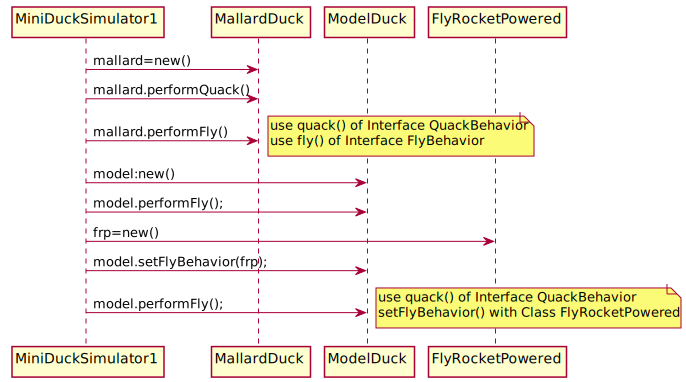

In [19]:
%%plantuml
@startuml
MiniDuckSimulator1 -> MallardDuck:mallard=new()
MiniDuckSimulator1 -> MallardDuck:mallard.performQuack()
MiniDuckSimulator1 -> MallardDuck:mallard.performFly()
note right
    use quack() of Interface QuackBehavior
    use fly() of Interface FlyBehavior
end note

MiniDuckSimulator1 -> ModelDuck:model:new()
MiniDuckSimulator1 -> ModelDuck:model.performFly();
MiniDuckSimulator1 -> FlyRocketPowered:frp=new()
MiniDuckSimulator1 -> ModelDuck:model.setFlyBehavior(frp);
MiniDuckSimulator1 -> ModelDuck:model.performFly();
note right
    use quack() of Interface QuackBehavior
    setFlyBehavior() with Class FlyRocketPowered
end note

@enduml

In [ ]:
# %load /Users/media/Code/git/sd/src/headfirst/strategy/MiniDuckSimulator1.java
package headfirst.strategy;

public class MiniDuckSimulator1 {
 
	public static void main(String[] args) {
 
		Duck mallard = new MallardDuck();
		mallard.performQuack();
		mallard.performFly();
   
		Duck model = new ModelDuck();
		model.performFly();
		model.setFlyBehavior(new FlyRocketPowered());
		model.performFly();
	}
}

In [ ]:
# %load /Users/media/Code/git/sd/src/headfirst/strategy/Duck.java
package headfirst.strategy;

public abstract class Duck {
	FlyBehavior flyBehavior;
	QuackBehavior quackBehavior;
 
	public Duck() {
	}
 
	public void setFlyBehavior (FlyBehavior fb) {
		flyBehavior = fb;
	}
 
	public void setQuackBehavior(QuackBehavior qb) {
		quackBehavior = qb;
	}
 
	abstract void display();
 
	public void performFly() {
		flyBehavior.fly();
	}
 
	public void performQuack() {
		quackBehavior.quack();
	}
 
	public void swim() {
		System.out.println("All ducks float, even decoys!");
	}
}


In [ ]:
# %load /Users/media/Code/git/sd/src/headfirst/strategy/MallardDuck.java
package headfirst.strategy;

public class MallardDuck extends Duck {
 
	public MallardDuck() {
 
		quackBehavior = new Quack();
        flyBehavior = new FlyWithWings();
	}
 
	public void display() {
		System.out.println("I'm a real Mallard duck");
	}
}


In [ ]:
# %load /Users/media/Code/git/sd/src/headfirst/strategy/ModelDuck.java
package headfirst.strategy;

public class ModelDuck extends Duck {
	public ModelDuck() {
		flyBehavior = new FlyNoWay();
		quackBehavior = new Quack();
	}

	public void display() {
		System.out.println("I'm a model duck");
	}
}


In [ ]:
# %load /Users/media/Code/git/sd/src/headfirst/strategy/QuackBehavior.java
package headfirst.strategy;

public interface QuackBehavior {
	public void quack();
}


In [ ]:
# %load /Users/media/Code/git/sd/src/headfirst/strategy/Quack.java
package headfirst.strategy;

public class Quack implements QuackBehavior {
	public void quack() {
		System.out.println("Quack");
	}
}


In [ ]:
# %load /Users/media/Code/git/sd/src/headfirst/strategy/FlyBehavior.java
package headfirst.strategy;

public interface FlyBehavior {
	public void fly();
}


In [ ]:
# %load /Users/media/Code/git/sd/src/headfirst/strategy/FlyWithWings.java
package headfirst.strategy;

public class FlyWithWings implements FlyBehavior {
	public void fly() {
		System.out.println("I'm flying!!");
	}
}


In [ ]:
# %load /Users/media/Code/git/sd/src/headfirst/strategy/FlyRocketPowered.java
package headfirst.strategy;

public class FlyRocketPowered implements FlyBehavior {
	public void fly() {
		System.out.println("I'm flying with a rocket");
	}
}


In [10]:
%pwd

u'/Users/media/Dropbox/Me/toCopy/smu'

In [ ]:
# change to the root directory
!javac -d classes/ -sourcepath src/ src/headfirst/strategy/*.java
!java -cp classes/ headfirst.strategy.MiniDuckSimulator1

### 1.4.2 정렬

* /*출처 -r 50-75 caseSort.md*/
* 무엇이 문제인가? 중복되는가? 재사용할 수 있는가? 변하는 부분이 어떤 부분인가?
    * 문제는 sort가 중복 -> v0에서 재현

버전 | 설명
-----|-----
v0 | 정렬 알고리즘이 중복. 정수, 문자에 따라 비교 방식만 다르고 나머지 중복 
v1 | Comparable
v2 | Compararator



##### v0

* 숫자와 문자열을 정렬하는 경우, 알고리즘이 중복된다.
* 중복정도는 비교하는 부분을 제외하고는 거의 같다.


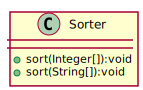

In [26]:
%%plantuml
@startuml
class Sorter {
    +sort(Integer[]):void
    +sort(String[]):void
}
@enduml

* String객체는 compareTo()를 사용하여 비교할 수 있다.

In [17]:
String[] data={"John", "Adam", "Skrien", "Smith", "Jones"};

for(int i=data.length-1;i>=0;i--) {
    int indexOfMax=0;
    for(int j=1;j<=i;j++) {
        if(data[j].compareTo(data[indexOfMax])>0)
            indexOfMax=j;
    }
    String temp=data[i];
    data[i]=data[indexOfMax];
    data[indexOfMax]=temp;
}

for(int i=0; i<data.length; i++)
    System.out.println("data["+i+"]="+data[i]);

 String[] data={"John", "Adam", "Skrien", "Smith", "Jones"};
|  Modified variable data of type String[] with initial value [Ljava.lang.String;@25bbe1b6
|    Update overwrote variable data

 

 for(int i=data.length-1;i>=0;i--) {
     int indexOfMax=0;
     for(int j=1;j<=i;j++) {
         if(data[j].compareTo(data[indexOfMax])>0)
             indexOfMax=j;
     }
     String temp=data[i];
     data[i]=data[indexOfMax];
     data[indexOfMax]=temp;
 }

 

 for(int i=0; i<data.length; i++)
     System.out.println("data["+i+"]="+data[i]);
data[0]=Adam
data[1]=John
data[2]=Jones
data[3]=Skrien
data[4]=Smith



* Integer객체는 부등호로 비교한다.
* String을 비교하는 것

In [20]:
Integer[] data={new Integer(3), new Integer(1), new Integer(4), new Integer(2)};
for(int i=data.length-1;i>=0;i--) {
    int indexOfMax=0;
    for(int j=1;j<=i;j++) {
        if(data[j] > data[indexOfMax])
            indexOfMax=j;
        }
    Integer temp=data[i];
    data[i]=data[indexOfMax];
    data[indexOfMax]=temp;
}

for(int i=0; i<data.length; i++)
    System.out.println("data["+i+"]="+data[i]);

)};
|  Modified variable data of type Integer[] with initial value [Ljava.lang.Integer;@192b07fd
|    Update overwrote variable data

 for(int i=data.length-1;i>=0;i--) {
     int indexOfMax=0;
     for(int j=1;j<=i;j++) {
         if(data[j] > data[indexOfMax])
             indexOfMax=j;
         }
     Integer temp=data[i];
     data[i]=data[indexOfMax];
     data[indexOfMax]=temp;
 }

 

 for(int i=0; i<data.length; i++)
     System.out.println("data["+i+"]="+data[i]);
data[0]=1
data[1]=2
data[2]=3
data[3]=4



#### v1:  template패턴

* v0에서의 중복
    * 정수, 문자, 객체마다 비교하는 알고리즘이 다름
        * 정수는 단순히 빼주면 됨
        * 문자는 String.compareTo()를 사용
        * 객체는 비교하려는 대상에 따라 다름
    * 문제해결
        * Comparable interface 구현
            * compareTo() 만들고, sort()에서 호출해서 해결 (template pattern)
        * 라이브러리 sort이용
            * Arrays.sort() (Array를 구현한 경우)
            * Collections.sort() (Collection interface를 구현한 경우)
            * compareTo()를 호출 (template pattern)


In [ ]:
* 숫자, 문자의 compareTo()를 이용한 정렬

In [10]:
Integer[] num=new Integer[] {5,3,4,2,1};
Arrays.sort(num);
for(int i=0;i<num.length;i++)
    System.out.println(num[i]);

 Integer[] num=new Integer[] {5,3,4,2,1};
|  Modified variable num of type Integer[] with initial value [Ljava.lang.Integer;@6fd02e5
|    Update overwrote variable num

 Arrays.sort(num);

 for(int i=0;i<num.length;i++)
     System.out.println(num[i]);
1
2
3
4
5



In [16]:
String[] s={"John", "Adam", "Skrien", "Smith", "Jones"};
Arrays.sort(s)
for(int i=0;i<s.length;i++)
    System.out.println(s[i]);

 String[] s={"John", "Adam", "Skrien", "Smith", "Jones"};
|  Added variable s of type String[] with initial value [Ljava.lang.String;@5bcab519

 Arrays.sort(s)

 for(int i=0;i<s.length;i++)
     System.out.println(s[i]);
Adam
John
Jones
Skrien
Smith



In [15]:
List<Integer> num=new ArrayList<Integer>();
num.add(7)
num.add(6)
num.add(9)
num.add(8)
num.add(5)
Collections.sort(num)
for(int i=0;i<num.size();i++)
    System.out.println(num.get(i));

 List<Integer> num=new ArrayList<Integer>();
|  Modified variable num of type List<Integer> with initial value []
|    Update overwrote variable num

 num.add(7)
|  Expression value is: true
|    assigned to temporary variable $16 of type boolean

 num.add(6)
|  Expression value is: true
|    assigned to temporary variable $17 of type boolean

 num.add(9)
|  Expression value is: true
|    assigned to temporary variable $18 of type boolean

 num.add(8)
|  Expression value is: true
|    assigned to temporary variable $19 of type boolean

 num.add(5)
|  Expression value is: true
|    assigned to temporary variable $20 of type boolean

 Collections.sort(num)

 for(int i=0;i<num.size();i++)
     System.out.println(num.get(i));
5
6
7
8
9



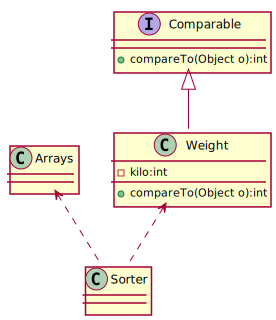

In [29]:
%%plantuml
@startuml
interface Comparable {
    +compareTo(Object o):int
}
class Weight {
    -kilo:int
    +compareTo(Object o):int
}
Comparable <|-- Weight
Sorter .up.> Weight
Sorter .up.> Arrays
@enduml

In [ ]:
# %load src/com/sd/sort/v1/Weight.java
/*
 * @author jsl
 * @since 20170313 20160302
 */

package com.sd.sort.v1;
//import java.util.Arrays;

public class Weight implements Comparable {
    private int kilo;
    public Weight(int k) {
        kilo=k;
    }
    public int compareTo(Object o) {
        Weight w=(Weight)o;
        return this.kilo-w.kilo;
    }
    public String toString() {
        String msg=kilo+"";
        return msg;
    }
}



In [ ]:
# %load src/com/sd/sort/v1/WeightSorterMainV1.java
/*
 * @author jsl
 * @since 20160302
 */

package com.sd.sort.v1;
import java.util.Arrays;

public class WeightSorterMainV1 {
    public static void main(String[] args){
        Weight[] weights=new Weight[3];
        weights[0]=new Weight(50);
        weights[1]=new Weight(40);
        weights[2]=new Weight(70);
        Arrays.sort(weights);
        for(Weight w:weights)
            System.out.println(w.toString());
    }
}



* WeightTurtle
* jshell로 실행

In [23]:
/classpath classes:lib/aplu5.jar

 /classpath classes:lib/aplu5.jar
|  Path 'classes:lib/aplu5.jar' added to classpath



In [24]:
import com.sd.sort.v1.WeightTurtleComparable;
List<WeightTurtleComparable> l=new ArrayList<WeightTurtleComparable>();
WeightTurtleComparable wt10=new WeightTurtleComparable(10);
WeightTurtleComparable wt15=new WeightTurtleComparable(15);
l.add(wt10);
l.add(wt15);
java.util.Collections.sort(l);

 import com.sd.sort.v1.WeightTurtleComparable;

 List<WeightTurtleComparable> l=new ArrayList<WeightTurtleComparable>();
|  Modified variable l of type List<WeightTurtleComparable> with initial value []
|    Update overwrote variable l

 WeightTurtleComparable wt10=new WeightTurtleComparable(10);
|  Modified variable wt10 of type WeightTurtleComparable with initial value Turtle(Position=(0,0), Heading=0)
|    Update overwrote variable wt10

 WeightTurtleComparable wt15=new WeightTurtleComparable(15);
|  Modified variable wt15 of type WeightTurtleComparable with initial value Turtle(Position=(0,0), Heading=0)
|    Update overwrote variable wt15

 l.add(wt10);
|  Expression value is: true
|    assigned to temporary variable $41 of type boolean

 l.add(wt15);
|  Expression value is: true
|    assigned to temporary variable $42 of type boolean

 java.util.Collections.sort(l);



#### v2

* v2 comparator comparable
    * v0 문제를 다른 방식으로 해결
    * v1는 implements comparable -> template pattern -> compareTo()
    * v2는 implements comparator -> strategy pattern -> compare()
        * comparator 인터페이스를 구현하고, sorter를 구현
        * 문제를 strategy pattern으로 해결
        * 다형적으로 argument에 실시간으로 맞는 comparator를 넣어줌.

```
> import com.sd.turtle.*;
> WeightTurtle wt10 = new WeightTurtle(10);
> WeightTurtle wt20 = new WeightTurtle(20);
> TurtleComparator tc=new TurtleComparator()
> int res=tc.compare(wt10,wt20)
> res
-10
```

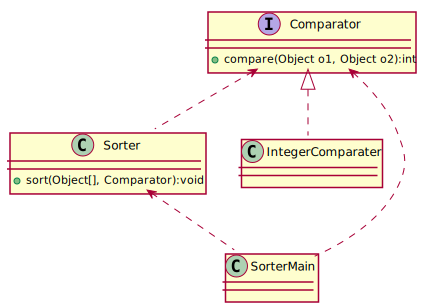

In [31]:
%%plantuml
@startuml
interface Comparator {
    +compare(Object o1, Object o2):int
}

class Sorter {
    +sort(Object[], Comparator):void
}
Comparator <|.. IntegerComparater
Comparator <.. Sorter
SorterMain .up.> Comparator
SorterMain .up.> Sorter
@enduml

In [ ]:
# %load /Users/media/Code/git/sd/src/com/sd/sort/v2/SorterMainV2.java
/*
 * @author js
 * @since 20160312
 * to show v2 strategy pattern using interface Comparator
 * run
 * javac -d classes/ -cp lib/aplu5.jar -sourcepath src/ src/com/sd/sort/v2/SorterMainV2.java 
 * java -cp classes/:lib/aplu5.jar com.sd.sort.v2.SorterMainV2
 * cases
 * 1) Integer
 * 2) String
 * 3) Turtle
 *      TurtleComparator did not implement java.util.Comparator
 *      see separately saved TurtleComparator.java

> com.sd.sort.v2.Sorter s = new com.sd.sort.v2.Sorter()
> com.sd.sort.v2.Comparator stringComp = new com.sd.sort.v2.StringComparator()
> String[] B={"John", "Adam", "Skrien", "Smith", "Jones"};
> s.sort(B,stringComp)
> B
{ Adam, John, Jones, Skrien, Smith }
> Integer[] C = {new Integer(3), new Integer(1), new Integer(4), new Integer(2)};
> com.sd.sort.v2.Comparator integerComp=new com.sd.sort.v2.IntegerComparator();
> s.sort(C,integerComp)
> C
{ 1, 2, 3, 4 }
> java com.sd.sort.v2.SorterMainV2
B[0]=Adam
B[1]=John
B[2]=Jones
B[3]=Skrien
B[4]=Smith
C[0]=1
C[1]=2
C[2]=3
C[3]=4
  *
  */

package com.sd.sort.v2;
import java.util.Date;
import com.sd.turtle.WeightTurtle;

public class SorterMainV2 {
    public static void main(String[] args) {
        String[] B={"John", "Adam", "Skrien", "Smith", "Jones"};
        Comparator stringComp=new StringComparator();
        Sorter.sort(B, stringComp);

        Integer[] C = {new Integer(3), new Integer(1), new Integer(4), new Integer(2)};
        Comparator integerComp=new IntegerComparator();
        Sorter.sort(C, integerComp);

        for(int i=0; i<B.length; i++)
            System.out.println("B["+i+"]="+B[i]);
        for(int i=0; i<C.length; i++)
            System.out.println("C["+i+"]="+C[i]);

        WeightTurtle wt30 = new WeightTurtle(30);
        WeightTurtle wt10 = new WeightTurtle(10);
        WeightTurtle wt20 = new WeightTurtle(20);
        WeightTurtle[] wts={wt30, wt10, wt20};
        Comparator turtleComp=new TurtleComparator();
        Sorter.sort(wts, turtleComp);

        for(int i=0; i<wts.length; i++)
            System.out.println("WeightTurtleArray["+i+"]="+wts[i].getWeight());
    }
}

class Sorter {
  public Sorter() {}
    public static void sort(Object[] data, Comparator comp) {
        for(int i=data.length-1; i>=1; i--) {
            int indexOfMax=0;
            for(int j=1; j<=i; j++) {
                if(comp.compare(data[j], data[indexOfMax]) > 0)
                    indexOfMax=j;
                }
                Object temp=data[i];
                data[i]=data[indexOfMax];
                data[indexOfMax]=temp;
        }
    }
}

// declare my own, also possible to use java.util.Comparator
interface Comparator {
    public int compare(Object o1, Object o2);
    public boolean equals(Object o);
}

class IntegerComparator implements Comparator {
    public IntegerComparator() {}
    public int compare(Object o1, Object o2) {
        return (Integer)o1 - (Integer)o2;
    }
}

class StringComparator implements Comparator {
    public StringComparator() {}
    public int compare(Object o1, Object o2) {
        String s1=(String)o1;
        String s2=(String)o2;
        return s1.compareTo(s2);
        //return Integer.parseInt((String) o1) -
        //   Integer.parseInt((String) o2);
    }
}

class TurtleComparator implements Comparator {
    public int compare(Object t1, Object t2) {
        return ((WeightTurtle)t1).getWeight()-((WeightTurtle)t2).getWeight();
    }
}


In [37]:
!javac -d classes/ -cp lib/aplu5.jar -sourcepath src/ src/com/sd/sort/v2/SorterMainV2.java 
!java -cp classes/:lib/aplu5.jar com.sd.sort.v2.SorterMainV2


B[0]=Adam
B[1]=John
B[2]=Jones
B[3]=Skrien
B[4]=Smith
C[0]=1
C[1]=2
C[2]=3
C[3]=4
WeightTurtleArray[0]=10
WeightTurtleArray[1]=20
WeightTurtleArray[2]=30


## 시작-1 java.util.Comparator를 이용해 구현

* 수요일까지 제출 (git)
* 1-2는 보고서로 제출

### 1-1 클래스다이어그램을 그리기
* plantuml로 그려서 script를 model에 저장
* DateComparator, ReverseComparator를 포함

### 1-2  SOLID원칙이 어떻게 적용되었는지 설명

* 원칙이 적용된 부분을 설명

### 1-3  구현
* 거북이를 정렬하는 TurtleComparator를 구현
* 일자를 정렬하는 DataComparator를 구현
* 문자를 역정렬하는 ReverseComparator를 구현

### 1-4 drjava 인터랙션을 이용해서 결과를 보기

* 거북이를 정렬